In [27]:
ACCESS_TOKEN="vk1.a.dJhdDp0m-uyx2qTSa1V5KE2RFhj6vVC34cXwvBxlbCmDTUMnKxLJfWcp5tkJArURSClCc_OZooGfeaxLtYUUHjfJy0qx_R6Uot8vYyzQ_1mvzb9tnvP_QtiYkc-4r-toZWaqR5bjFq0PKNcTg24YBFJSMycxMSxo4mV-RmXuZM6cUO8uWuV_-gOjMYxPgWxOY7-tiGQGUBRk17d-_gdNNA"
VERSION = 5.199

In [ ]:
# %%bash
# pip install requests
# pip install networkx
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install scikit-learn

## Получение друзей и друзей друзей

In [33]:
from collections import defaultdict
import requests

/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
all_users = {}

friends = defaultdict(set)

def get_friends_by_id(user_id):
  resp = requests.get("https://api.vk.com/method/friends.get", params={'access_token': ACCESS_TOKEN,
        'user_id': user_id,
        'v': VERSION,
        'fields': 'bdate,city,timezone,sex,status,last_name'})

  if resp.status_code != 200:
    print(f"Request failed with status code: {resp.status_code}, user_id: {user_id}")
    return

  resp = resp.json()

  if resp.get('error'):
    print(f"Request failed with error: {resp.get('error')}, user_id: {user_id}")
    return

  for item in resp.get('response', {}).get('items', []):
    all_users[item['id']] = {
      'id': item.get('id'),
      'birthdate' : item.get('bdate'),
      'city' : item.get('city', {}).get('title'),
      'sex' : item.get('sex'),
      'name' : item.get('first_name', '') + ' ' + item.get('last_name', ''),
    }
    friends[user_id].add(item["id"])
    friends[item["id"]].add(user_id)

# Мои друзья
get_friends_by_id(316931542)

# Получаем друзей для друзей
all_friends = list(all_users.keys()).copy()

count = 0
for friend in all_friends:
  get_friends_by_id(friend)
  count += 1
  if count % 1000 == 0:
    print(str(count) + ' пользователей обработано')

Request failed with error: {'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '5927666'}, {'key': 'v', 'value': '5.199'}, {'key': 'fields', 'value': 'bdate,city,timezone,sex,status,last_name'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}, user_id: 5927666
Request failed with error: {'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '29284565'}, {'key': 'v', 'value': '5.199'}, {'key': 'fields', 'value': 'bdate,city,timezone,sex,status,last_name'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}, user_id: 29284565
Request failed with error: {'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'user_id', 'value': '94121124'}, {'key': 'v', 'value': '5.199'}, {'key': 'fields', 'value': 'bdate,city,timezone,sex,status,last_name'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'v

### Получаем всех друзей для друзей друзей

In [41]:
all_friends = defaultdict(set)

def verify_friends(user_id):
  resp = requests.get("https://api.vk.com/method/friends.get", params={'access_token': ACCESS_TOKEN,
        'user_id': user_id,
        'v': VERSION})

  if resp.status_code != 200:
    print(f"Request failed with status code: {resp.status_code}, user_id: {user_id}")
    return resp.text
  resp = resp.json()
  if resp.get('error'):
    if ('limit' in str(resp)) or ('rate' in str(resp)):
      print('Достигнут лимит запросов')
      return str(resp)
    return None

  for item in resp.get('response', {}).get('items', []):
    if all_users.get(item):
      friends[user_id].add(item)
      friends[item].add(user_id)

    all_friends[user_id].add(item)
    all_friends[item].add(user_id)
  return None

In [42]:
sorted_keys = sorted(all_users)

count = 0
for i in range(len(sorted_keys)):
    count += 1
    stop = verify_friends(sorted_keys[i])
    if stop:
        print(f'Остановка на индексе {i} на пользователе {sorted_keys[i]}, из-за ошибки: {stop}')
        break
    if count % 1000 == 0:
        print(str(count) + ' пользователей обработано')

1000 пользователей обработано
2000 пользователей обработано
3000 пользователей обработано
4000 пользователей обработано
5000 пользователей обработано
6000 пользователей обработано
7000 пользователей обработано
Достигнут лимит запросов
Остановка на индексе 7180 на пользователе 166139582, из-за ошибки: {'error': {'error_code': 29, 'error_msg': 'Rate limit reached', 'request_params': [{'key': 'user_id', 'value': '166139582'}, {'key': 'v', 'value': '5.199'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}}


In [46]:
ACCESS_TOKEN="vk1.a.bJRwDoZlTLD0evjtFsZas2hSwji9ZJJfUvse5wFDs-nkoQ3Pb_-VedNFxLP8KXp4We6p9MACMp_ob-5gamLX-ACcRs_qflomw9uo2UZRkcuAV8Y8Ev6Lt0Jei5tPQPUFHY3v95GqPdQb9n74pxiaQjc9I_L30ciVMsfQP7riRhKpmeN-fVlwSt2Kmsu_orvTT3vumHiYUVDD6jLLfFYWkQ"

In [47]:
for i in range(7180, len(sorted_keys)):
    count += 1
    stop = verify_friends(sorted_keys[i])
    if stop:
        print(f'Остановка на индексе {i} на пользователе {sorted_keys[i]}, из-за ошибки: {stop}')
        break
    if count % 1000 == 0:
        print(str(count) + ' пользователей обработано')

8000 пользователей обработано
9000 пользователей обработано
10000 пользователей обработано
11000 пользователей обработано
12000 пользователей обработано
13000 пользователей обработано
14000 пользователей обработано
15000 пользователей обработано
16000 пользователей обработано
17000 пользователей обработано
Достигнут лимит запросов
Остановка на индексе 17708 на пользователе 429945728, из-за ошибки: {'error': {'error_code': 29, 'error_msg': 'Rate limit reached', 'request_params': [{'key': 'user_id', 'value': '429945728'}, {'key': 'v', 'value': '5.199'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}}


In [49]:
ACCESS_TOKEN="vk1.a.Ob5HmNVikzbb1haXKJJxWDgRMs1cI6N1uWefRn_KoFFfzwti9KOTZKxnpvBJ5KJFpzpNoJe-RgatFxhI-DiCrGclarIugXxG-4uMFVBESBQXr8Xc8u0AZEjdPii-wjPMzOS4psQttYKOPvvG_8eopAAtEuPkTyC-UpGnhWiFWuVsqhS61q4ytND7ip_Yt-cMZX5x-HM0AI4GETzIk618Lg"

In [50]:
for i in range(17708, len(sorted_keys)):
    count += 1
    stop = verify_friends(sorted_keys[i])
    if stop:
        print(f'Остановка на индексе {i} на пользователе {sorted_keys[i]}, из-за ошибки: {stop}')
        break
    if count % 1000 == 0:
        print(str(count) + ' пользователей обработано')

18000 пользователей обработано
19000 пользователей обработано
20000 пользователей обработано
21000 пользователей обработано
22000 пользователей обработано
23000 пользователей обработано
24000 пользователей обработано


In [51]:
import json

def save_to_json(filename, user_data, sets_data, all_sets_data):
    sets_for_json = {key: list(value) for key, value in sets_data.items()}
    all_sets_for_json = {key: list(value) for key, value in all_sets_data.items()}
    
    data = {
        "user_map": user_data,
        "number_sets": sets_for_json,
        "all_numbers_sets": all_sets_for_json
    }
    
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=2, ensure_ascii=False)

def load_from_json(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    user_map_dict = {}
    if 'user_map' in data:
        for user_id_str, user_info in data['user_map'].items():
            user_id = int(user_id_str)
            processed_info = {
                'id': int(user_info['id']),
                'sex': int(user_info['sex']),
                'birthdate': user_info.get('birthdate'),
                'city': user_info.get('city'),
                'name': user_info.get('name')
            }
            user_map_dict[user_id] = processed_info
    
    friends_data_dict = {}
    if 'number_sets' in data:
        for user_id_str, friends_list in data['number_sets'].items():
            user_id = int(user_id_str)
            friends_set = {int(friend_id) for friend_id in friends_list}
            friends_data_dict[user_id] = friends_set

    all_friends_data_dict = {}
    if 'all_numbers_sets' in data:
        for user_id_str, friends_list in data['all_numbers_sets'].items():
            user_id = int(user_id_str)
            friends_set = {int(friend_id) for friend_id in friends_list}
            friends_data_dict[user_id] = friends_set
    
    return user_map_dict, friends_data_dict, all_friends_data_dict

save_to_json("dump_final.json", all_users, friends, all_friends)

In [53]:
all_users, friends, all_friends = load_from_json("dump_final.json")

In [54]:
print('Количество вершин ' + str(len(all_users)))

vert_count = 0
for _, s in friends.items():
    vert_count += len(s)
print('Количество ребер ' + str(vert_count / 2))

Количество вершин 24484
Количество ребер 8437916.0


# 2 пункт, расчет центральности

In [55]:
import networkx as nx

In [56]:
G = nx.Graph()
for user_id, friends_set in friends.items():
    G.add_node(user_id)

    for friend_id in friends_set:
        G.add_edge(user_id, friend_id)
    
user_ids = [316931542]

print("Расчет центральности по посредничеству")
btw_centrality = nx.betweenness_centrality(G, k=min(1000, G.number_of_nodes()))
    

print("Расчет центральности по близости")
cls_centrality = nx.closeness_centrality(G)
    
print("Расчет центральности по собственному вектору")
eig_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    
results = {}
for member_id in user_ids:
    if member_id in G:
        results[member_id] = {
            'betweenness': btw_centrality.get(member_id, 0),
            'closeness': cls_centrality.get(member_id, 0),
            'eigenvector': eig_centrality.get(member_id, 0)
        }
    else:
        results[member_id] = {
            'betweenness': 0,
            'closeness': 0,
            'eigenvector': 0
        }

Расчет центральности по посредничеству


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_list = []
for user_id, metrics in results.items():
    row = {'user_id': user_id}
    row.update(metrics) 
    data_list.append(row)

results_df = pd.DataFrame(data_list)

results_df

,user_id,betweenness,closeness,eigenvector
0,316931542,0.329379,0.500942,0.003346


# 3 пункт, модель предсказания дружбы

In [60]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import math
import random

In [61]:
ROWS_NUMBER = 100000

In [66]:
len(all_users)

24484

In [67]:
users_list = list(all_users.keys())

friends_pairs = set()
count = 0
while len(friends_pairs) < ROWS_NUMBER:
    u = random.choice(users_list)
    v = random.choice(list(friends[u]))
    if v not in all_users:
        continue

    pair = tuple(sorted([u, v]))

    if pair not in friends_pairs:
        count += 1
        friends_pairs.add(pair)

        if count % 1000 == 0:
            print(str(count) + ' друзей обработано')

not_friends_pairs = set()
count = 0
while len(not_friends_pairs) < ROWS_NUMBER:
    u = random.choice(users_list)
    v = random.choice(users_list)
    if u == v:
        continue

    pair = tuple(sorted([u, v]))
    
    if (pair not in not_friends_pairs and v not in friends.get(u, set()) and u not in friends.get(v, set())):
        not_friends_pairs.add(pair)

        count += 1
        if count % 1000 == 0:
            print(str(count) + ' не друзей обработано')

friends_pairs = list(friends_pairs)
not_friends_pairs = list(not_friends_pairs)

print(f'{len(friends_pairs)} получено пар друзей')
print(f'{len(friends_pairs)} получено пар не друзей')

1000 друзей обработано
2000 друзей обработано
3000 друзей обработано
4000 друзей обработано
5000 друзей обработано
6000 друзей обработано
7000 друзей обработано
8000 друзей обработано
9000 друзей обработано
10000 друзей обработано
11000 друзей обработано
12000 друзей обработано
13000 друзей обработано
14000 друзей обработано
15000 друзей обработано
16000 друзей обработано
17000 друзей обработано
18000 друзей обработано
19000 друзей обработано
20000 друзей обработано
21000 друзей обработано
22000 друзей обработано
23000 друзей обработано
24000 друзей обработано
25000 друзей обработано
26000 друзей обработано
27000 друзей обработано
28000 друзей обработано
29000 друзей обработано
30000 друзей обработано
31000 друзей обработано
32000 друзей обработано
33000 друзей обработано
34000 друзей обработано
35000 друзей обработано
36000 друзей обработано
37000 друзей обработано
38000 друзей обработано
39000 друзей обработано
40000 друзей обработано
41000 друзей обработано
42000 друзей обработано
4

In [80]:
all_pairs = friends_pairs + not_friends_pairs
results = [1] * len(friends_pairs) + [0] * len(not_friends_pairs)


all_features = []
feature_names = [
    'equal_sex', 'equal_city',
    'first_friends', 'second_friends'
    'common_friends', 'common_friends_per_friends'
]

for u, v in all_pairs:
    features = []
    
    friends_u = friends.get(u, set())
    friends_v = friends.get(v, set())

    if all_users[u].get('sex'):
        if all_users[v].get('sex'):
            if all_users[u].get('sex') == all_users[v].get('sex'):
                features.append(1)
            else:
                features.append(0)
        else:
            features.append(-1)
    else:
        features.append(-1)

    if all_users[u].get('city'):
        if all_users[v].get('city'):
            if all_users[u].get('city') == all_users[v].get('city'):
                features.append(1)
            else:
                features.append(0)
        else:
            features.append(-1)
    else:
        features.append(-1)
    
    features.append(len(friends_u))
    features.append(len(friends_v))

    common_neighbors = len(friends_u & friends_v)
    features.append(common_neighbors)
    
    union_neighbors = len(friends_u | friends_v)
    if union_neighbors > 0:
        features.append(common_neighbors / union_neighbors)
    else:
        features.append(0)

    all_features.append(features)

X = np.array(all_features)
y = np.array(results)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")


Обучающая выборка: 160000 примеров
Тестовая выборка: 40000 примеров


In [81]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(
    n_estimators=10,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5, n_estimators=10,
                       random_state=42)

In [82]:

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc:.4f}")


              precision    recall  f1-score   support

           0       0.91      0.93      0.92     20000
           1       0.93      0.91      0.92     20000

    accuracy                           0.92     40000
   macro avg       0.92      0.92      0.92     40000
weighted avg       0.92      0.92      0.92     40000

ROC-AUC: 0.9702


In [ ]:
# %%bash
# pip install seaborn

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(70.72222222222221, 0.5, 'Истинный класс')

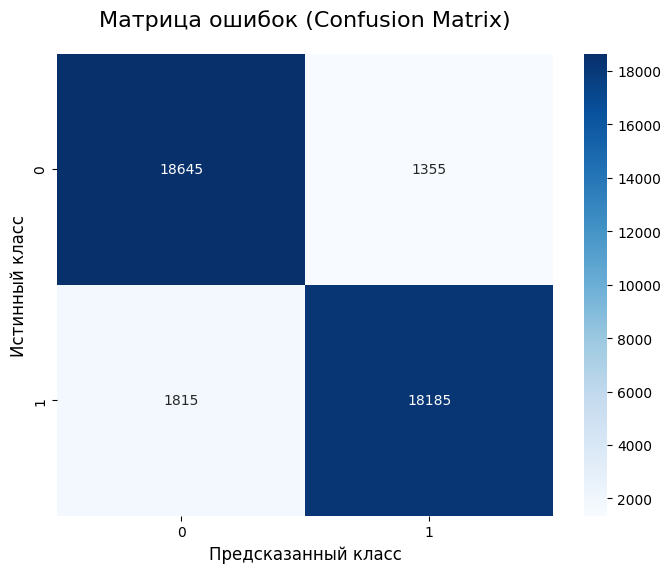

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                cbar=True,)
    
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=16, pad=20)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     20000
           1       0.94      0.91      0.92     20000

    accuracy                           0.92     40000
   macro avg       0.92      0.92      0.92     40000
weighted avg       0.92      0.92      0.92     40000

ROC-AUC: 0.9724


Text(70.72222222222221, 0.5, 'Истинный класс')

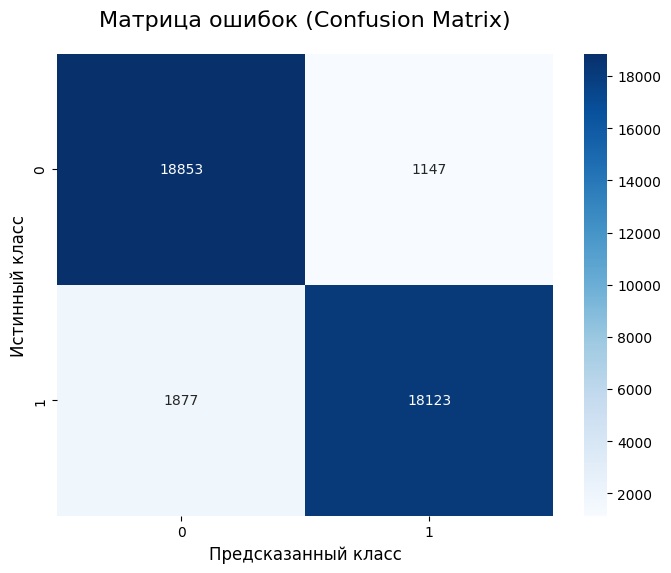

In [86]:
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                cbar=True,)
    
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=16, pad=20)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)


              precision    recall  f1-score   support

           0       0.77      0.94      0.85     20000
           1       0.92      0.72      0.81     20000

    accuracy                           0.83     40000
   macro avg       0.84      0.83      0.83     40000
weighted avg       0.84      0.83      0.83     40000

ROC-AUC: 0.9171


/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/xbhgbz/AILabs/1lab/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

Text(70.72222222222221, 0.5, 'Истинный класс')

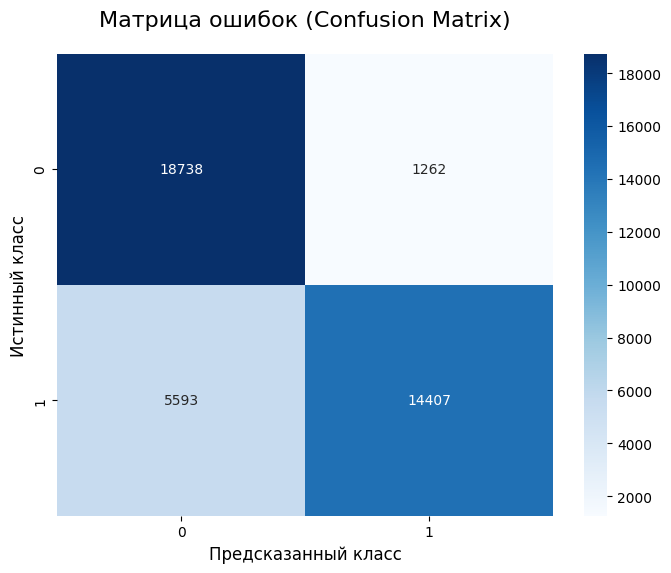

In [87]:
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                cbar=True,)
    
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=16, pad=20)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)